### 영화리뷰 분류

In [16]:
# 데이터 로딩
import gc
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [17]:
# 단어 -> 숫자 -> 단어
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [18]:
# 차원 동일
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [19]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [20]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [21]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [22]:
# 훈련데이터와 검증데이터 분리
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [23]:
partial_x_train.shape, x_val.shape

((15000, 10000), (10000, 10000))

In [24]:
# 학습
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 30ms/step - loss: 0.5174 - accuracy: 0.7923 - val_loss: 0.4267 - val_accuracy: 0.8369
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3175 - accuracy: 0.8989 - val_loss: 0.3389 - val_accuracy: 0.8691
Epoch 3/20
30/30 [==============================] - 0s 17ms/step - loss: 0.2327 - accuracy: 0.9247 - val_loss: 0.2841 - val_accuracy: 0.8889
Epoch 4/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1807 - accuracy: 0.9418 - val_loss: 0.2858 - val_accuracy: 0.8858
Epoch 5/20
30/30 [==============================] - 0s 17ms/step - loss: 0.1437 - accuracy: 0.9565 - val_loss: 0.2805 - val_accuracy: 0.8880
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1202 - accuracy: 0.9639 - val_loss: 0.2893 - val_accuracy: 0.8868
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1000 - accuracy: 0.9697 - val_loss: 0.3282 - val_accuracy: 0.8744
Epoch 8/20
30

In [25]:
print(history.history.keys()) # history attribute

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


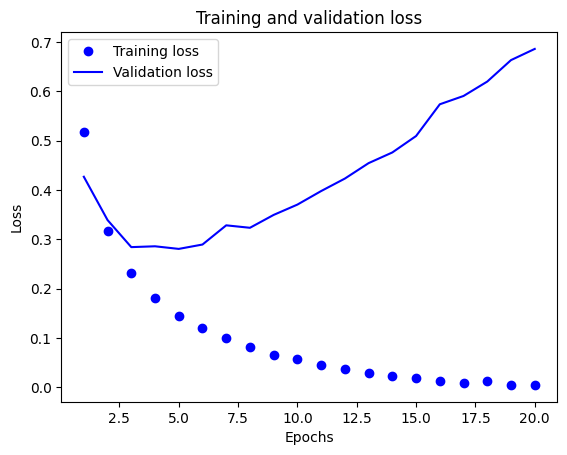

In [26]:
# 시각화
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

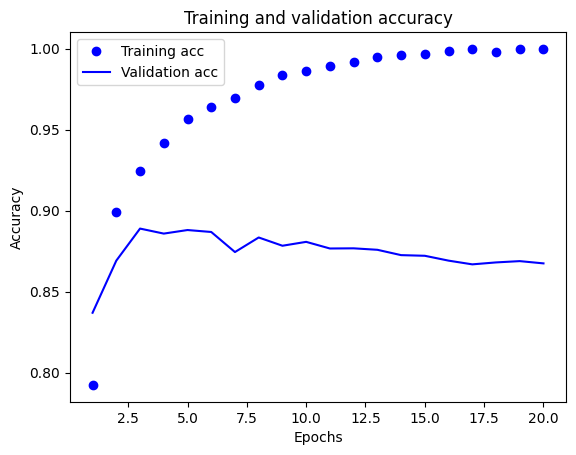

In [27]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [28]:
# 전체 데이터로 에포크만 4로 수정해서 학습(x_train), 평가(x_test)
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test) # 평가시 테스트데이터로 한다.
results

Epoch 1/4
49/49 [==============================] - 1s 10ms/step - loss: 0.1462 - accuracy: 0.8179
Epoch 2/4
49/49 [==============================] - 0s 9ms/step - loss: 0.0743 - accuracy: 0.9124
Epoch 3/4
49/49 [==============================] - 0s 9ms/step - loss: 0.0563 - accuracy: 0.9330
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.0895 - accuracy: 0.8792


[0.08946123719215393, 0.8791599869728088]

In [29]:
print(x_test.shape)
preds = model.predict(x_test)
print(preds[:5], y_test[:5])

(25000, 10000)
782/782 [==============================] - 2s 2ms/step
[[0.09412888]
 [0.9990545 ]
 [0.8110429 ]
 [0.6569923 ]
 [0.9282356 ]] [0. 1. 1. 0. 1.]


### 로이터 뉴스 분류

In [31]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [32]:
# 차원 동일
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [33]:
train_data.shape, x_train.shape

((8982,), (8982, 10000))

In [34]:
# 레이블 원핫
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [35]:
train_labels.shape, y_train.shape

((8982,), (8982, 46))

In [36]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [37]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [38]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [39]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 23ms/step - loss: 2.4560 - accuracy: 0.5465 - val_loss: 1.6657 - val_accuracy: 0.6520
Epoch 2/20
16/16 [==============================] - 0s 12ms/step - loss: 1.3754 - accuracy: 0.7093 - val_loss: 1.2896 - val_accuracy: 0.7190
Epoch 3/20
16/16 [==============================] - 0s 12ms/step - loss: 1.0338 - accuracy: 0.7808 - val_loss: 1.1406 - val_accuracy: 0.7380
Epoch 4/20
16/16 [==============================] - 0s 12ms/step - loss: 0.8142 - accuracy: 0.8267 - val_loss: 1.0189 - val_accuracy: 0.7790
Epoch 5/20
16/16 [==============================] - 0s 15ms/step - loss: 0.6486 - accuracy: 0.8636 - val_loss: 0.9700 - val_accuracy: 0.7980
Epoch 6/20
16/16 [==============================] - 0s 13ms/step - loss: 0.5170 - accuracy: 0.8926 - val_loss: 0.9095 - val_accuracy: 0.8150
Epoch 7/20
16/16 [==============================] - 0s 12ms/step - loss: 0.4147 - accuracy: 0.9163 - val_loss: 0.8922 - val_accuracy: 0.8190
Epoch 8/20
16

In [41]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                640064    
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dense_14 (Dense)            (None, 46)                2990      
                                                                 
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


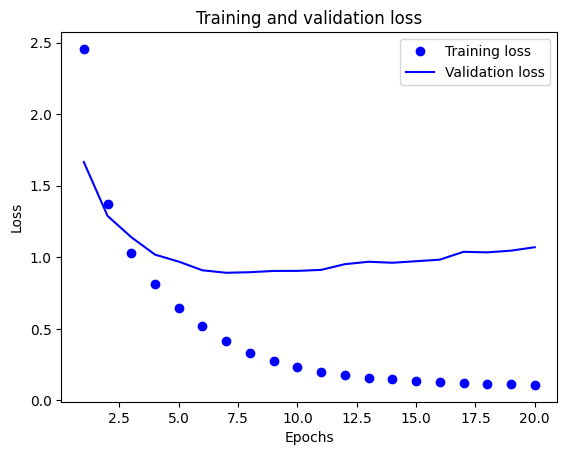

In [42]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

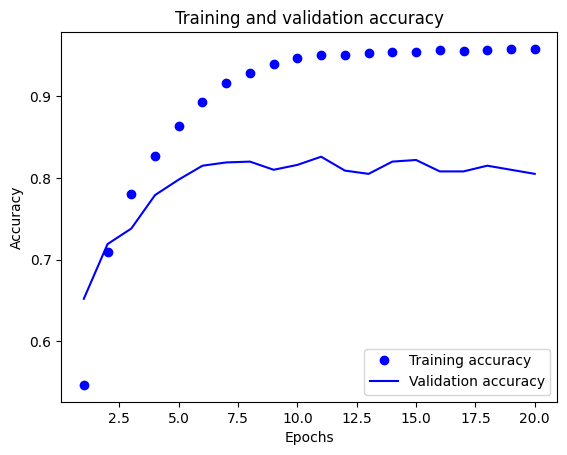

In [43]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [44]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 9ms/step - loss: 2.4618 - accuracy: 0.5668
Epoch 2/9
18/18 [==============================] - 0s 9ms/step - loss: 1.3067 - accuracy: 0.7216
Epoch 3/9
18/18 [==============================] - 0s 9ms/step - loss: 0.9758 - accuracy: 0.7934
Epoch 4/9
18/18 [==============================] - 0s 9ms/step - loss: 0.7668 - accuracy: 0.8380
Epoch 5/9
18/18 [==============================] - 0s 9ms/step - loss: 0.6088 - accuracy: 0.8733
Epoch 6/9
18/18 [==============================] - 0s 10ms/step - loss: 0.4826 - accuracy: 0.8998
Epoch 7/9
18/18 [==============================] - 0s 9ms/step - loss: 0.3980 - accuracy: 0.9142
Epoch 8/9
18/18 [==============================] - 0s 9ms/step - loss: 0.3246 - accuracy: 0.9320
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 0.9537 - accuracy: 0.7970


In [45]:
results

[0.9537007808685303, 0.796972393989563]

In [46]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 4ms/step


In [48]:
predictions[0].max()

0.8849803

In [49]:
predictions[0].argmax()

3

In [50]:
predictions[0].sum()

0.99999994

In [ ]:
# 레이블 원핫 안하고 처리

# 레이블 ndarray 변환


model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

In [53]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))
# results = model.evaluate()

Epoch 1/20
63/63 [==============================] - 1s 12ms/step - loss: 1.7888 - accuracy: 0.6259 - val_loss: 1.2145 - val_accuracy: 0.7200
Epoch 2/20
63/63 [==============================] - 0s 7ms/step - loss: 0.9379 - accuracy: 0.7984 - val_loss: 0.9741 - val_accuracy: 0.7970
Epoch 3/20
63/63 [==============================] - 0s 7ms/step - loss: 0.6146 - accuracy: 0.8690 - val_loss: 0.8927 - val_accuracy: 0.8120
Epoch 4/20
63/63 [==============================] - 0s 7ms/step - loss: 0.4110 - accuracy: 0.9107 - val_loss: 0.8708 - val_accuracy: 0.8290
Epoch 5/20
63/63 [==============================] - 1s 9ms/step - loss: 0.2986 - accuracy: 0.9336 - val_loss: 0.8595 - val_accuracy: 0.8360
Epoch 6/20
63/63 [==============================] - 0s 8ms/step - loss: 0.2292 - accuracy: 0.9454 - val_loss: 0.9522 - val_accuracy: 0.8100
Epoch 7/20
63/63 [==============================] - 0s 7ms/step - loss: 0.1953 - accuracy: 0.9511 - val_loss: 1.0404 - val_accuracy: 0.8020
Epoch 8/20
63/63 [=

In [54]:
gc.collect()

10999